<a href="https://colab.research.google.com/github/Mathildeholst/Git_training/blob/main/Eksempler.korrekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* train_data, test_data: lists of reviews (each review is a list of word indexes)

* train_labels, test_labels: labels (0 = negative, 1 = positive)

* num_words=10000: only keep the 10,000 most common words; the rest are ignored
  * Train faster

  * Use less memory

  * Avoid rare, unhelpful words

In short: 10,000 is a good limit to keep the important words and make training easier.

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

This is the first review in the IMDB training set, but it’s not written in words — it’s written as a list of integers.
* Each number is a word ID that points to a word in a dictionary of the 10,000 most common words.

* So train_data[0] is one review, written as a list of word indices.



In [ ]:
train_labels[0]

np.int64(1)

This means the label for the first review in the training set is 1.

* 1 = positive review

* 0 = negative review

So train_labels[0] tells us that the first review in train_data[0] is a positive review.

The np.int64(1) just shows that the label is stored as a NumPy 64-bit integer.

In [ ]:
max([max(sequence) for sequence in train_data])

9999

This line finds the largest word index in the training data.
* The biggest word ID in the dataset is 9999, since we only kept the most common 10,000 words.

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

? means "unknown word" – the model doesn't recognize it because it's not in the top 10,000 words.

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # create matrix full of 0s
    for i, sequence in enumerate(sequences): # go through each review
        for j in sequence:
            results[i, j] = 1.  # set 1 where word appears
    return results
#This turns your train_data and test_data into vectors of 0s and 1s
#so they are ready to be used in a neural network.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Each review becomes a fixed-size vector (length 10,000),
with 1s for words that appear in the review.

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

x_train[0] is the multi-hot encoded version of the first review.

It’s a vector with 10,000 numbers:

1. means that word is in the review

0. means that word is not in the review



In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

* train_labels and test_labels are lists of 0s and 1s (negative or positive)

* np.asarray(...) turns them into NumPy arrays

* .astype("float32") makes sure the data type is float, not integer — because models usually expect floats

This makes the labels ready for training by converting them into float32 arrays.

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Sequential means the layers are stacked in order (one after the other)
* A sequential fully connected (dense) network is a neural network where every neuron in one layer is connected to every neuron in the next layer.

The first two layers


→ Each has 16 units (neurons)


→ Uses ReLU activation to learn patterns

The last layer

→ Outputs a single number between 0 and 1


→ Used for binary classification (positive or negative)

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

* We use RMSprop to train the model
* Binary crossentropy because it's a yes/no problem,
* and we check how accurate it is.

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You are splitting the training data into two parts:

Validation set:
* The first 10,000 samples → used to check how well the model is doing during training
(x_val, y_val)

Partial training set:
* The rest of the data → used to actually train the model
(partial_x_train, partial_y_train)

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7146 - loss: 0.6010 - val_accuracy: 0.8534 - val_loss: 0.4225
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8955 - loss: 0.3510 - val_accuracy: 0.8645 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9132 - loss: 0.2629 - val_accuracy: 0.8878 - val_loss: 0.2877
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9345 - loss: 0.2052 - val_accuracy: 0.8869 - val_loss: 0.2821
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9482 - loss: 0.1690 - val_accuracy: 0.8867 - val_loss: 0.2761
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9580 - loss: 0.1444 - val_accuracy: 0.8869 - val_loss: 0.2890
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9648 - loss: 0.1213 - val_accuracy: 0.8844 - val_loss: 0.2907
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9706 - loss: 0.1019 - val_accuracy: 0.8816 - 

It trains the model on the training data

* Runs for 20 rounds (called epochs)

* Uses 512 samples at a time (this is the batch size)

Also checks performance on the validation set after each epoch

30/30

Hele IMDB-datasættet:
50.000 anmeldelser i alt

25.000 til træning (train_data)

25.000 til test (test_data)

* 10.000 bruges til validation

* 15.000 tilbage til faktisk træning (partial_x_train)

15000 / 512 ≈ 29.3 → afrundes op til 30 batches


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

It saves information about how the model did during training.

* 'accuracy': How correct the model was on the training data.

* 'loss': How wrong the model was on the training data.

* 'val_accuracy': How correct the model was on the validation data.

* 'val_loss': How wrong the model was on the validation data.

**Plotting the training and validation loss**

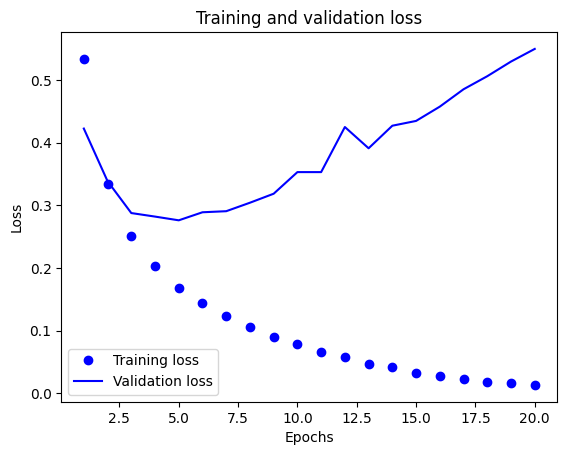

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

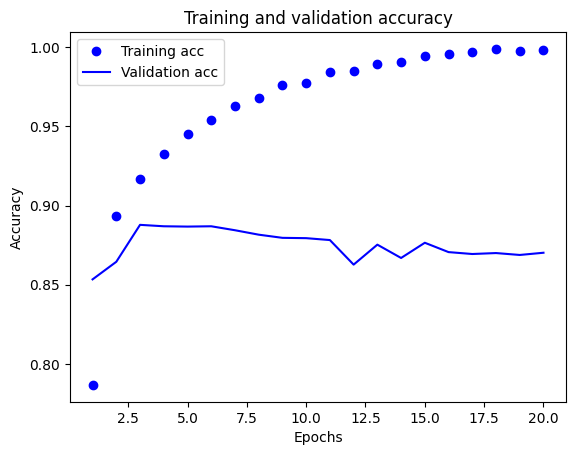

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

USE LOSS TO DECIDE EPOCH NUMER!!!!

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.7348 - loss: 0.5635
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9010 - loss: 0.2940
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9243 - loss: 0.2208
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9368 - loss: 0.1827
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8757 - loss: 0.3083


In [ ]:
results

[0.3036986291408539, 0.8776400089263916]

1. We build the model again from scratch.

2. We compile it with the same optimizer, loss, and metric.

3. Then we train it on all training data — including the 10,000 validation samples we used earlier.

4. We only train for 4 epochs, because that’s when validation loss was best (before overfitting started).

5. Finally, we evaluate the model on the test set to see how well it performs on completely new data.

These are your final test results after retraining the model:

* 0.3037 → Loss on the test set (how far off the predictions were).

* 0.8776 → Accuracy on the test set (about 87.8% correct predictions).

This means your model does a good job at classifying positive vs. negative reviews — it got nearly 88% of them right on unseen data.

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.27828333],
       [0.99988765],
       [0.94548875],
       ...,
       [0.1487144 ],
       [0.14237073],
       [0.7455331 ]], dtype=float32)

Makes the model predict whether each review in the test set is positive (close to 1) or negative (close to 0).

What it means:
* Values close to 1 → the model thinks the review is positive.

* Values close to 0 → the model thinks the review is negative.

* Values around 0.5–0.7 → the model is less confident.

So, it doesn’t just give a 0 or 1 — it gives a probability for how positive it thinks each review is.

* If prediction ≥ 0.5 → Positive (label 1)

* If prediction < 0.5 → Negative (label 0)


## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

You're loading the Reuters newswire dataset from Keras.

* It contains 8,982 training samples and 2,246 test samples.

* Each sample is a news article, already converted into a list of word index numbers.

* num_words=10000 means you're only keeping the 10,000 most common words, so the model doesn't waste time on rare words.

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

This is the 11th news article in your training set.

It's shown as a list of integers.

Each number is a word ID — it represents a word from the article.

The actual text has been preprocessed and turned into numbers to make it usable for the neural network.



**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_labels[10]

np.int64(3)

In the Reuters dataset, there are 46 possible categories, labeled as numbers from 0 to 45.

So a label of 3 means:

* This article belongs to category 3.

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Each article (a list of word IDs) is converted into a vector of 0s and 1s.

The vector has length 10,000 (because we only kept the 10,000 most common words).

* 1 means a word is present in the article

* 0 means it’s not

In [ ]:
x_train[10, 1:100]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

This shows the values from position 1 to 99 in the 11th article’s vector
(remember, Python starts counting from 0).

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) #make all 0s
    for i, label in enumerate(labels):
        results[i, label] = 1. #set 1 at the label's index
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

* Her bruger vi også multi-hot encoding til input (samme som IMDB).

* Men output (label) er anderledes!

* Nu skal vi vælge én kategori ud af 46 → derfor bruger vi one-hot encoding til labels.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

You turn category numbers into vectors of 0s and 1s,
so the model can learn to classify into 46 categories.

This code turns your labels into a format the model can understand for multi-class classification.


*NB!!! hvis vi ikke ville have brugt one-hot encoding, vi kunne have brugt integer encoding instead: *

y_train = np.array(train_labels)


y_test = np.array(test_labels)

In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Shows that article 11 belongs to category 3

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

We are building a model that has layers stacked one after the other.

→ First hidden layer with 64 neurons, using ReLU as activation.
This helps the model learn complex patterns.

→ Second hidden layer, also with 64 neurons and ReLU.
Adding more layers helps the model learn deeper features.

→ Output layer with 46 neurons (because we have 46 categories).
Softmax gives probabilities for each category — the one with the highest probability is the predicted topic.

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

optimizer="rmsprop"
* Controls how the model updates its weights during training.
RMSprop is good at adapting the learning rate automatically — very useful for deep learning.

loss="categorical_crossentropy"
* Since this is a multi-class classification problem (46 categories), we use categorical crossentropy to measure how wrong the model’s predictions are.

metrics=["accuracy"]
* We track how often the model guesses the correct category.



### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3573 - loss: 3.2940 - val_accuracy: 0.5990 - val_loss: 1.9535
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6519 - loss: 1.7255 - val_accuracy: 0.6910 - val_loss: 1.4032
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7424 - loss: 1.2292 - val_accuracy: 0.7360 - val_loss: 1.2017
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7778 - loss: 1.0127 - val_accuracy: 0.7570 - val_loss: 1.0965
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8220 - loss: 0.8420 - val_accuracy: 0.7750 - val_loss: 1.0261
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8542 - loss: 0.6750 - val_accuracy: 0.7920 - val_loss: 0.9606
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8797 - loss: 0.5668 - val_accuracy: 0.8060 - val_loss: 0.9337
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9061 - loss: 0.4545 - val_accuracy: 0.8120 - v

The result is stored in the history object, which keeps track of the model's performance during training (like loss and accuracy).

**Plotting the training and validation loss**

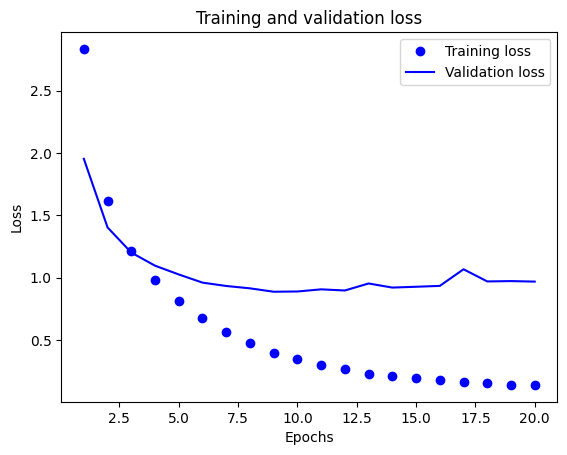

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

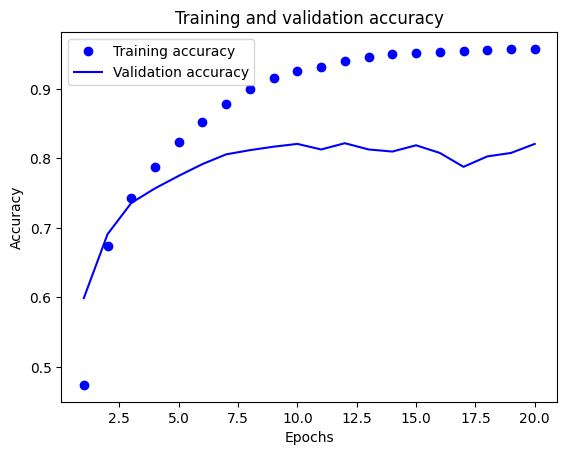

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the chart of loss, I would recommend stopping the training around epoch 8 to 10.

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4154 - loss: 3.0969
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6688 - loss: 1.5596
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7377 - loss: 1.1822
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7941 - loss: 0.9542
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8385 - loss: 0.7584
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8629 - loss: 0.6483
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8901 - loss: 0.5158
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9104 - loss: 0.4400
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9249 - loss: 0.3620
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7988 - loss: 0.9041


In [ ]:
results

[0.9161673784255981, 0.7947462201118469]

0.785 (accuracy): The model's correct predictions percentage, about 78.5%.

The model is performing decently but could be improved with further tuning.

In [ ]:
#Compare to random classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.195013357079252)

Your teacher is explaining that if we randomly guess the categories, we would expect to be correct around 19% of the time. This is because the dataset has 46 possible categories (since there are 46 different classes), and with random guessing, you'd expect to get about 1 out of 5 correct, which is approximately 19%.

So, when the model achieves around 80% accuracy, it means it's doing much better than random guessing (which would be expected to get only about 19% correct). Therefore, an accuracy of 80% is considered quite good in comparison to random guessing.

In [ ]:
#Compare to majority category
hits_array = np.array(test_labels) == 3
hits_array.mean()

np.float64(0.3619768477292965)

In this case, the most common category (the majority category) is category 3, and the model would achieve about 36% accuracy if it simply guessed this category every time (i.e., always predicted category 3).

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
predictions[0].shape

(46,)

This means the model gives 46 numbers (probabilities) for the first test article—one for each category.

So predictions[0] tells us how likely the model thinks the article belongs to each of the 46 categories. The highest value shows the most likely category.

In [ ]:
np.sum(predictions[0])

np.float32(1.0)

This shows that the sum of all 46 predicted probabilities for one article is very close to 1.0 (actually 1.0000001, which is just due to rounding error).

In [ ]:
np.argmax(predictions[0])

np.int64(3)

Article 1 in the test set is predicted to belong to category 3.

### When data is imbalanced - F1

In [ ]:
import tensorflow as tf
f1_metric = tf.keras.metrics.F1Score(average='macro', name='f1_score')
#This sets up the F1-score as an extra metric to track during training.

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy",  f1_metric]) #Now the model will track both accuracy and F1-score as it trains.

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9501 - f1_score: 0.9270 - loss: 0.1586
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9603 - f1_score: 0.9383 - loss: 0.1219
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9605 - f1_score: 0.9381 - loss: 0.1137
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9604 - f1_score: 0.9484 - loss: 0.1180
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9569 - f1_score: 0.9292 - loss: 0.1213
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9596 - f1_score: 0.9375 - loss: 0.1099
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9591 - f1_score: 0.9361 - loss: 0.1150
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9614 - f1_score: 0.9380 - loss: 0.0990
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9574 - f1_score: 0.9383 - loss: 0.1081


Because this is a multi-class problem with 46 classes,
macro-averaging makes sure that each class is treated equally —
even if some classes appear much less often than others.

This gives a fairer view of how well the model performs on all classes.

NB!! man kunne godt have brugt validation

In [ ]:
test_loss, test_acc, test_f1 = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}") #Prints accuracy and F1-score with 4 decimal places.
print(f"Test F1-score: {test_f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8014 - f1_score: 0.4902 - loss: 1.1133

Test Accuracy: 0.7939
Test F1-score: 0.5650


Test Accuracy: 0.7939
* The model predicted the correct class in about 79% of the test samples.

* This is quite strong for a 46-class classification task.

Test F1-score: 0.5650
* The F1-score is lower, around 56.5%, which means:

  * The model is good at predicting the most common classes,

  * But not as strong on the rare ones.

F1-score is more sensitive to imbalanced data, so this suggests the model might still miss or misclassify rare categories.

### A different way to handle the labels and the loss
Hvis the var interger coding istedet for one hot

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1644 - loss: 3.4517 - val_accuracy: 0.5090 - val_loss: 2.5614
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5348 - loss: 2.2674 - val_accuracy: 0.5800 - val_loss: 1.7933
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5882 - loss: 1.6464 - val_accuracy: 0.5970 - val_loss: 1.5750
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6060 - loss: 1.4571 - val_accuracy: 0.6240 - val_loss: 1.4908
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6453 - loss: 1.3581 - val_accuracy: 0.6340 - val_loss: 1.4472
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6823 - loss: 1.2107 - val_accuracy: 0.6410 - val_loss: 1.4143
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7022 - loss: 1.1169 - val_accuracy: 0.6540 - val_loss: 1.3966
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7185 - loss: 1.0416 - val_accuracy: 0.6550 - v

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [12]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [13]:
train_data.shape

(404, 13)

There are 404 samples in the training data (rows)

Each sample has 13 features (also called input variables) (colums)

In [14]:
test_data.shape

(102, 13)

In [15]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Targets are the correct values the model should learn to predict.

Example:
If the input is data about a house,
→ the target is the real price of that house.

### Preparing the data

**Normalizing the data**

In [16]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

This code normalizes the data — makes all features have the same scale.

This helps the model learn faster and better, because all input values are on the same scale.

❌ You're not using test data to compute anything

✅ You're using training data only to standardize both sets

In [17]:
train_data.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.80933376e-15, -7.80453809e-17,
       -5.25047552e-15,  6.43187374e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.05526149e-16,  2.36614908e-14,  5.96710525e-15,
        6.13920356e-16])

So when your teacher says: “Creating a zero-dimensional tensor containing the mean of each feature”

They mean:
 "We are computing the mean for each column, and storing those mean values in a tensor (array)."

It helps us normalize the data in the next step.

### Building your model

**Model definition**

In [18]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #We are predicting a single continuous value - so no activation function
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

* Two hidden layers with 64 neurons each

* Output layer with 1 neuron (because we predict one number)

* Loss: mse (mean squared error)

* Metric: mae (mean absolute error), easier to understand (e.g., "$2,000 off")

### Validating your approach using K-fold validation

**K-fold validation**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np # Import the numpy library and assign it the alias 'np'
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


* 4 folds
* an integer value with the number of observations in each fold (101)
* 100 epochs
* an empty list to hold the scores

The rest is: 4-fold in action

In [21]:
all_scores

[1.9295721054077148, 2.6768195629119873, 2.434980630874634, 2.2917444705963135]

Each number is the Mean Absolute Error (MAE) for one fold,
so on average, the model’s predictions are about 2,000 dollars off (since the target is in $1,000s).

You can now compute the mean of these scores to get a more stable estimate of how well the model performs.

In [22]:
np.mean(all_scores)

np.float64(2.3332791924476624)

This means that, on average, the model is $2,333 off when predicting house prices.



**Saving the validation logs at each fold**

This is 4-fold cross-validation — but with 500 epochs and tracking validation MAE over time:

In [23]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


You now get how the model’s validation performance changes over time for each fold —
so you can later average them and decide when to stop training to avoid overfitting.

**Building the history of successive mean K-fold validation scores**

In [24]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

This line of code calculates the average validation MAE (Mean Absolute Error) at each epoch across all the folds in k-fold cross-validation.

**Plotting validation scores**

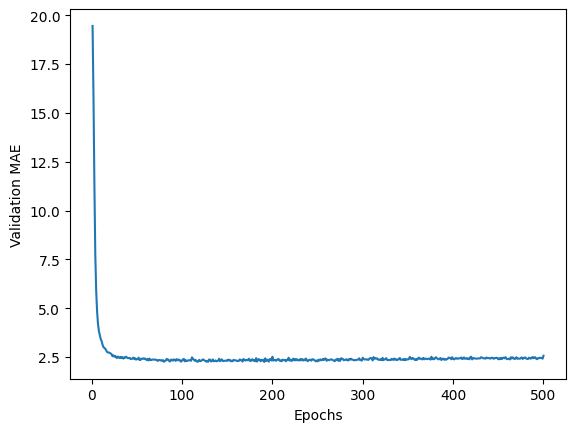

In [26]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it the alias 'plt'
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

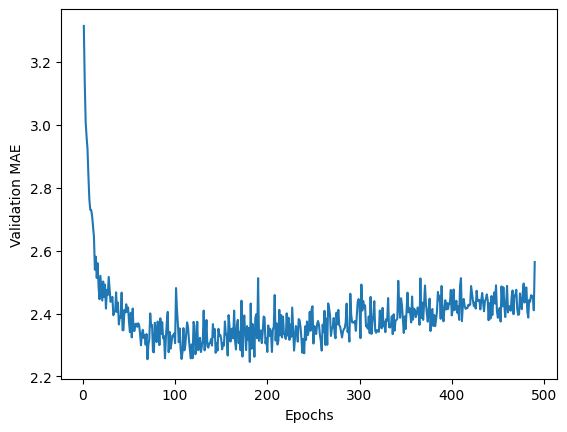

In [27]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

SE NOTER FOR FORKLARING AF PLOTS

**Training the final model**

In [28]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2042 - mae: 2.3659


This code trains the final model and checks how well it performs on new (unseen) test data.

* Trains the model on the entire training set, for 130 epochs (based on what you learned from validation).
* batch_size=16 means the model updates weights after every 16 samples.
* verbose=0 hides the training output.

In [29]:
test_mae_score

2.557532787322998

Since your target values are in thousands of dollars,
→ the model's predictions are, on average, $2,560 off from the actual house prices.

This gives you a real-world sense of how accurate your model is when making predictions on new, unseen data.

### Generating predictions on new data

In [31]:
predictions = model.predict(test_data)
predictions[0]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([6.847299], dtype=float32)

predictions[0] = 6.85
* So, the model predicts that the house price for the first test input is about $6,850
(because targets are in thousands of dollars).

In [32]:
test_targets[0]


np.float64(7.2)

This was the correct price